In [1]:
from self_supervised.pipelines.supervised_validation.dataset_io import get_dataset
import yaml
from pathlib import Path

data_path = Path("/home/daniel/lab_share/projects/CottonFlower2021/flower_dataset/dataset.yaml")
hyperparams = yaml.load(open("../hyp.scratch-low.yml"))
dataset = get_dataset(data_path, image_size=480, heatmap_size=240, batch_size=32, hyperparams=hyperparams)

[02/01/23 13:35:13] WARNING  /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-pac ]8;id=888112;file:///home/daniel/.pyenv/versions/3.8.11/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=76636;file:///home/daniel/.pyenv/versions/3.8.11/lib/python3.8/warnings.py#109\109]8;;\
                             kages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update                
                             jupyter and ipywidgets. See                                                           
                             https://ipywidgets.readthedocs.io/en/stable/user_install.html                         
                               from .autonotebook import tqdm as notebook_tqdm                                     
                                                                                                                   

[02/01/23 13:35:14] WARNING  /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-pac ]8;id=36774;file:///home/daniel/.pyenv/versions/3.8.11/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=518133;file:///home/daniel/.pyenv/versions/3.8.11/lib/python3.8/warnings.py#109\109]8;;\
                             kages/thop/profile.py:12: DeprecationWarning: distutils Version                       
                             classes are deprecated. Use packaging.version instead.                                
                               if LooseVersion(torch.__version__) < LooseVersion("1.0.0"):                         
                                                                                                                   

                    WARNING  /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-pac ]8;id=314649;file:///home/daniel/.pyenv/versions/3.8.11/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=153665;file:///home/daniel/.pyenv/versions/3.8.11/lib/python3.8/warnings.py#109\109]8;;\
                             kages/thop/profile.py:68: DeprecationWarning: distutils Version                       
                             classes are deprecated. Use packaging.version instead.                                
                               if LooseVersion(torch.__version__) >= LooseVersion("1.1.0"):                        
                                                                                                                   

                    WARNING  /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-pac ]8;id=125609;file:///home/daniel/.pyenv/versions/3.8.11/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=194685;file:///home/daniel/.pyenv/versions/3.8.11/lib/python3.8/warnings.py#109\109]8;;\
                             kages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version                      
                             classes are deprecated. Use packaging.version instead.                                
                               if LooseVersion(mpl.__version__) >= "3.0":                                          
                                                                                                                   

                    WARNING  /home/daniel/git/self-supervised-learning/.venv/lib/python3.8/site-pac ]8;id=859032;file:///home/daniel/.pyenv/versions/3.8.11/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=741073;file:///home/daniel/.pyenv/versions/3.8.11/lib/python3.8/warnings.py#109\109]8;;\
                             kages/setuptools/_distutils/version.py:346: DeprecationWarning:                       
                             distutils Version classes are deprecated. Use packaging.version                       
                             instead.                                                                              
                               other = LooseVersion(other)                                                         
                                                                                                                   

                    WARNING  /tmp/ipykernel_160350/4068623425.py:6: YAMLLoadWarning: calling        ]8;id=968171;file:///home/daniel/.pyenv/versions/3.8.11/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=637614;file:///home/daniel/.pyenv/versions/3.8.11/lib/python3.8/warnings.py#109\109]8;;\
                             yaml.load() without Loader=... is deprecated, as the default Loader is                
                             unsafe. Please read https://msg.pyyaml.org/load for full details.                     
                               hyperparams = yaml.load(open("../hyp.scratch-low.yml"))                             
                                                                                                                   

Scanning /run/user/1001/gvfs/smb-share:server=bsailn2.ad.ufl.edu,share=bsail,user=daniel/projects/CottonFlower2021/flower_dataset/active_1/labels.cache... 2275 images, 629 backgrounds, 0 corrupt: 100%|██████████| 2462/2462 [00:00<?, ?it/s]


In [2]:
len(dataset)

2462

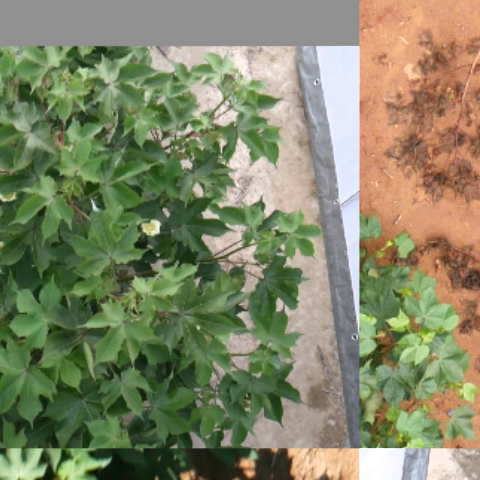

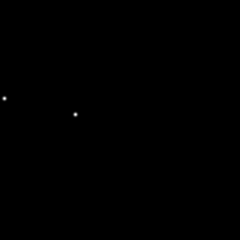

tensor([[0.00000, 0.00000, 0.31575, 0.47641, 0.04422, 0.03801],
        [0.00000, 0.00000, 0.01881, 0.40853, 0.03762, 0.03414]])

'/run/user/1001/gvfs/smb-share:server=bsailn2.ad.ufl.edu,share=bsail,user=daniel/projects/CottonFlower2021/flower_dataset/active_1/images/p0_P1090018.JPG'

In [4]:
from PIL import Image
import torch

image, heatmap, boxes, files, _ = dataset[0]

disp_heatmap = torch.cat(((heatmap * 255).to(torch.uint8),) * 3, 0)
display(Image.fromarray(image.permute((1, 2, 0)).numpy()))
display(Image.fromarray(disp_heatmap.permute(1, 2, 0).numpy()))
display(boxes)
display(files)